In [2]:
import pandas as pd

# Load datasets
revenue_df = pd.read_csv("C:/Users/HARI KRUPA/Downloads/revenue.csv")
expenses_df = pd.read_csv("C:/Users/HARI KRUPA/Downloads/expenses.csv")
customers_df = pd.read_csv("C:/Users/HARI KRUPA/Downloads/customers.csv")

In [ ]:
# Convert date columns
revenue_df["Month"] = pd.to_datetime(revenue_df["Month"])
expenses_df["Month"] = pd.to_datetime(expenses_df["Month"])
customers_df["JoinDate"] = pd.to_datetime(customers_df["JoinDate"])
customers_df["ChurnDate"] = pd.to_datetime(customers_df["ChurnDate"])

In [4]:
# Preview the first few rows of each dataset
print(revenue_df.head())
print(expenses_df.head())
print(customers_df.head())

  CustomerID    Month  Amount
0       C001  2023-05  112.95
1       C002  2023-09   99.20
2       C002  2023-10  128.35
3       C002  2023-11  135.22
4       C002  2023-12   85.88
     Month         Category  Amount
0  2023-01         Salaries   14006
1  2023-01        Marketing    3170
2  2023-01  Hosting & Infra    1981
3  2023-01             Misc    1278
4  2023-02         Salaries   15829
  CustomerID    JoinDate   ChurnDate  AcquisitionCost  TotalRevenue
0       C001  2023-06-26  2023-12-31            22.74        435.55
1       C002  2023-02-21  2023-08-02            27.41       1167.05
2       C003  2023-09-19  2023-12-31            33.36        314.21
3       C004  2023-01-16  2023-10-09            55.14        792.99
4       C005  2023-01-24  2023-08-17            58.93        623.75


In [24]:
#  Calculate Monthly Revenue
# Group by month and sum the revenue
monthly_revenue = revenue_df.groupby(revenue_df["Month"].dt.to_period("M"))["Amount"].sum().reset_index()

In [26]:
# Convert period to timestamp (datetime format)
monthly_revenue["Month"] = monthly_revenue["Month"].dt.to_timestamp()

In [28]:
# Rename columns
monthly_revenue.columns = ["Month", "TotalRevenue"]

In [30]:
# Show the result
print(monthly_revenue.head())

       Month  TotalRevenue
0 2023-01-01       3980.89
1 2023-02-01       6844.91
2 2023-03-01       8742.56
3 2023-04-01      10263.42
4 2023-05-01      11537.81


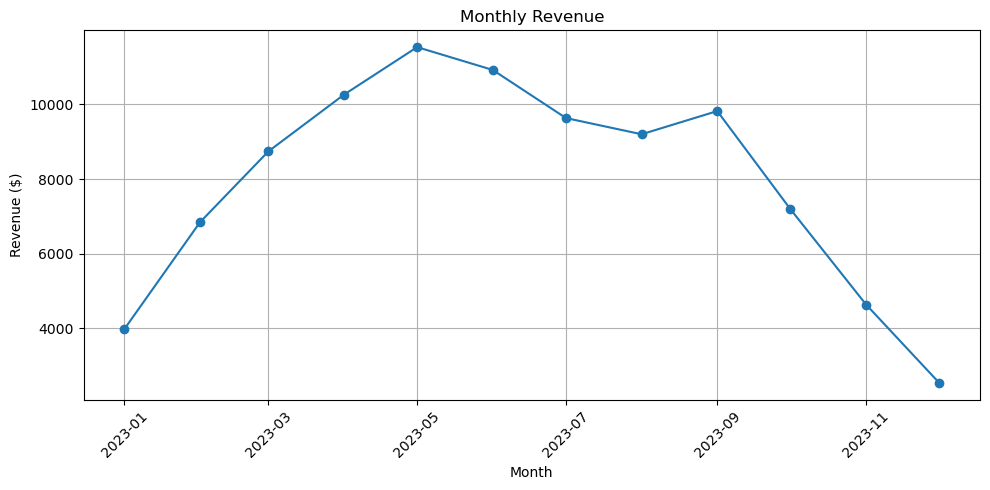

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["Month"], monthly_revenue["TotalRevenue"], marker='o')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

# Step 1: Convert 'Month' column to datetime format
expenses_df["Month"] = pd.to_datetime(expenses_df["Month"], errors="coerce")

# Step 2: Drop rows where 'Month' conversion failed (optional but recommended)
expenses_df = expenses_df.dropna(subset=["Month"])

# Step 3: Group by month and sum the 'Amount'
monthly_expenses = (
    expenses_df.groupby(expenses_df["Month"].dt.to_period("M"))["Amount"]
    .sum()
    .reset_index()
)

# Step 4: Rename columns for clarity (optional)
monthly_expenses.columns = ["Month", "Total_Expenses"]

# Step 5: Convert 'Month' to string for readability (optional)
monthly_expenses["Month"] = monthly_expenses["Month"].astype(str)

# Output result
print(monthly_expenses)


      Month  Total_Expenses
0   2023-01           20435
1   2023-02           22620
2   2023-03           22064
3   2023-04           26264
4   2023-05           23545
5   2023-06           24422
6   2023-07           23375
7   2023-08           26915
8   2023-09           24330
9   2023-10           26528
10  2023-11           24040
11  2023-12           26510


In [46]:
# Rename the column
monthly_expenses.columns = ["Month", "TotalExpenses"]

In [50]:
# Ensure both Month columns are strings
monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)
monthly_expenses["Month"] = monthly_expenses["Month"].astype(str)

# Merge on Month
burn_rate = pd.merge(monthly_revenue, monthly_expenses, on="Month", how="outer").fillna(0)


In [52]:
monthly_revenue["Month"] = pd.to_datetime(monthly_revenue["Month"])
monthly_expenses["Month"] = pd.to_datetime(monthly_expenses["Month"])

burn_rate = pd.merge(monthly_revenue, monthly_expenses, on="Month", how="outer").fillna(0)


In [54]:
# Calculate the burn rate
burn_rate["BurnRate"] = burn_rate["TotalExpenses"] - burn_rate["TotalRevenue"]

In [56]:
# Show the result
burn_rate.head()

,Month,TotalRevenue,TotalExpenses,BurnRate
0,2023-01-01,3980.89,20435,16454.11
1,2023-02-01,6844.91,22620,15775.09
2,2023-03-01,8742.56,22064,13321.44
3,2023-04-01,10263.42,26264,16000.58
4,2023-05-01,11537.81,23545,12007.19


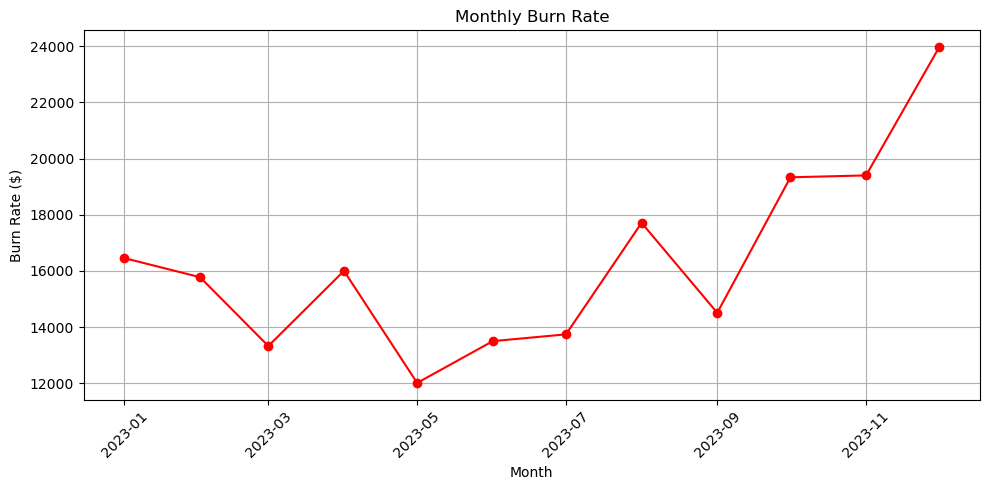

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(burn_rate["Month"], burn_rate["BurnRate"], marker='o', color='red')
plt.title("Monthly Burn Rate")
plt.xlabel("Month")
plt.ylabel("Burn Rate ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Step 1: Convert 'JoinDate' to datetime format
customers_df["JoinDate"] = pd.to_datetime(customers_df["JoinDate"], errors="coerce")

# Step 2: Extract the join month as a timestamp (e.g., 2023-05-01)
customers_df["JoinMonth"] = customers_df["JoinDate"].dt.to_period("M").dt.to_timestamp()


In [64]:
print(customers_df[["JoinDate", "JoinMonth"]].head())
print(customers_df.dtypes)


    JoinDate  JoinMonth
0 2023-06-26 2023-06-01
1 2023-02-21 2023-02-01
2 2023-09-19 2023-09-01
3 2023-01-16 2023-01-01
4 2023-01-24 2023-01-01
CustomerID                 object
JoinDate           datetime64[ns]
ChurnDate                  object
AcquisitionCost           float64
TotalRevenue              float64
JoinMonth          datetime64[ns]
dtype: object


In [66]:
# Group by JoinMonth to calculate total acquisition cost and number of new customers
monthly_cac = customers_df.groupby("JoinMonth").agg({
    "AcquisitionCost": "sum",  # Total cost to acquire customers
    "CustomerID": "count"      # Total number of new customers
}).reset_index()

In [68]:
# Rename columns for clarity
monthly_cac.columns = ["Month", "TotalAcquisitionCost", "NewCustomers"]

In [70]:
# Calculate CAC
monthly_cac["CAC"] = monthly_cac["TotalAcquisitionCost"] / monthly_cac["NewCustomers"]

In [72]:
# Show the result
monthly_cac.head()

,Month,TotalAcquisitionCost,NewCustomers,CAC
0,2023-01-01,1046.49,25,41.859600
1,2023-02-01,942.81,25,37.712400
2,2023-03-01,1119.68,27,41.469630
3,2023-04-01,984.26,22,44.739091
4,2023-05-01,1087.70,25,43.508000


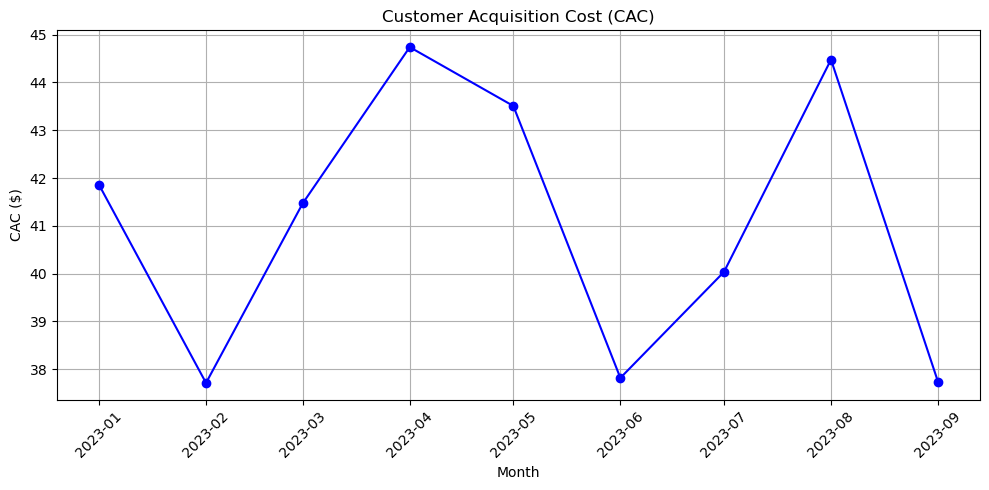

In [74]:
plt.figure(figsize=(10,5))
plt.plot(monthly_cac["Month"], monthly_cac["CAC"], marker='o', color='blue')
plt.title("Customer Acquisition Cost (CAC)")
plt.xlabel("Month")
plt.ylabel("CAC ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Calculate ARPU: Average revenue per user per month
arpu = revenue_df.groupby(revenue_df["Month"].dt.to_period("M"))["Amount"].sum() / revenue_df["CustomerID"].nunique()

In [80]:
# Step 1: Ensure JoinDate and ChurnDate are in datetime format
customers_df["JoinDate"] = pd.to_datetime(customers_df["JoinDate"], errors="coerce")
customers_df["ChurnDate"] = pd.to_datetime(customers_df["ChurnDate"], errors="coerce")

# Step 2: Calculate lifetime in months (approximate as days // 30)
customers_df["LifetimeMonths"] = ((customers_df["ChurnDate"] - customers_df["JoinDate"]).dt.days // 30)


In [82]:
print(customers_df[["JoinDate", "ChurnDate"]].dtypes)


JoinDate     datetime64[ns]
ChurnDate    datetime64[ns]
dtype: object


In [86]:
print(customers_df.columns)


Index(['CustomerID', 'JoinDate', 'ChurnDate', 'AcquisitionCost',
       'TotalRevenue', 'JoinMonth', 'LifetimeMonths'],
      dtype='object')


In [90]:
customers_df["MonthlyRevenue"] = customers_df["TotalRevenue"] / customers_df["LifetimeMonths"]

In [93]:
customers_df["MonthlyRevenue"] = 100  # placeholder value


In [95]:
customers_df["LTV"] = customers_df["MonthlyRevenue"] * customers_df["LifetimeMonths"]
overall_ltv = customers_df["LTV"].mean()
print("Average LTV:", overall_ltv)


Average LTV: 584.0


In [97]:
print(customers_df.head())


  CustomerID   JoinDate  ChurnDate  AcquisitionCost  TotalRevenue  JoinMonth  \
0       C001 2023-06-26 2023-12-31            22.74        435.55 2023-06-01   
1       C002 2023-02-21 2023-08-02            27.41       1167.05 2023-02-01   
2       C003 2023-09-19 2023-12-31            33.36        314.21 2023-09-01   
3       C004 2023-01-16 2023-10-09            55.14        792.99 2023-01-01   
4       C005 2023-01-24 2023-08-17            58.93        623.75 2023-01-01   

   LifetimeMonths  MonthlyRevenue  LTV  
0               6             100  600  
1               5             100  500  
2               3             100  300  
3               8             100  800  
4               6             100  600  


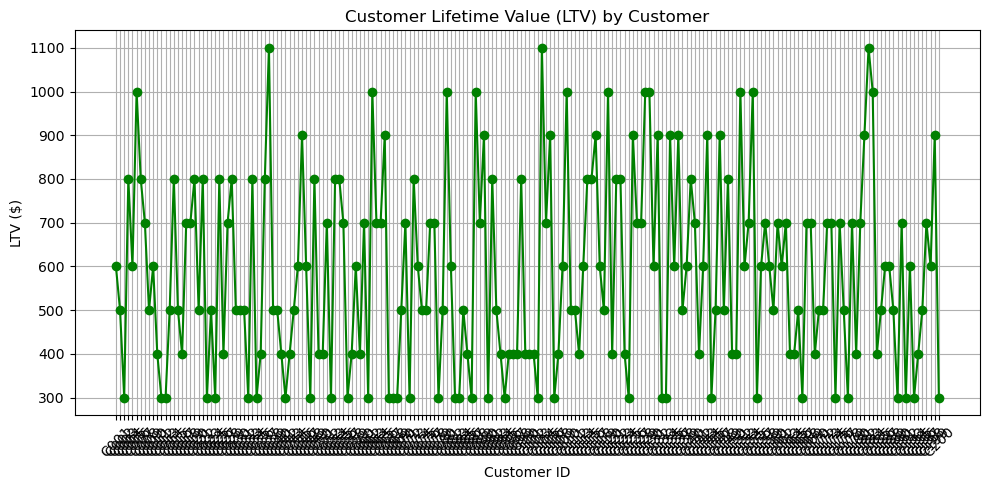

In [99]:
plt.figure(figsize=(10,5))
plt.plot(customers_df["CustomerID"], customers_df["LTV"], marker='o', color='green')
plt.title("Customer Lifetime Value (LTV) by Customer")
plt.xlabel("Customer ID")
plt.ylabel("LTV ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
# Strip spaces from column names
monthly_cac.columns = monthly_cac.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()

# Re-check the column names
print(monthly_cac.columns)
print(customers_df.columns)


Index(['Month', 'TotalAcquisitionCost', 'NewCustomers', 'CAC'], dtype='object')
Index(['CustomerID', 'JoinDate', 'ChurnDate', 'AcquisitionCost',
       'TotalRevenue', 'JoinMonth', 'LifetimeMonths', 'MonthlyRevenue', 'LTV'],
      dtype='object')


In [103]:
# Check the column names of both dataframes
print("monthly_cac columns:", monthly_cac.columns)
print("customers_df columns:", customers_df.columns)


monthly_cac columns: Index(['Month', 'TotalAcquisitionCost', 'NewCustomers', 'CAC'], dtype='object')
customers_df columns: Index(['CustomerID', 'JoinDate', 'ChurnDate', 'AcquisitionCost',
       'TotalRevenue', 'JoinMonth', 'LifetimeMonths', 'MonthlyRevenue', 'LTV'],
      dtype='object')


In [105]:
# Aggregate LTV by JoinMonth
monthly_ltv = customers_df.groupby('JoinMonth')['LTV'].mean().reset_index()

# Merge the monthly LTV with monthly_cac based on 'Month' and 'JoinMonth'
ltv_cac_ratio = pd.merge(monthly_cac, monthly_ltv, left_on='Month', right_on='JoinMonth', how='outer')

# Check the result
print(ltv_cac_ratio.head())


       Month  TotalAcquisitionCost  NewCustomers        CAC  JoinMonth  \
0 2023-01-01               1046.49            25  41.859600 2023-01-01   
1 2023-02-01                942.81            25  37.712400 2023-02-01   
2 2023-03-01               1119.68            27  41.469630 2023-03-01   
3 2023-04-01                984.26            22  44.739091 2023-04-01   
4 2023-05-01               1087.70            25  43.508000 2023-05-01   

          LTV  
0  792.000000  
1  700.000000  
2  677.777778  
3  622.727273  
4  588.000000  


In [107]:
# Strip spaces from column names in both dataframes
monthly_cac.columns = monthly_cac.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()

# Re-check column names
print("After stripping spaces:")
print("monthly_cac columns:", monthly_cac.columns)
print("customers_df columns:", customers_df.columns)


After stripping spaces:
monthly_cac columns: Index(['Month', 'TotalAcquisitionCost', 'NewCustomers', 'CAC'], dtype='object')
customers_df columns: Index(['CustomerID', 'JoinDate', 'ChurnDate', 'AcquisitionCost',
       'TotalRevenue', 'JoinMonth', 'LifetimeMonths', 'MonthlyRevenue', 'LTV'],
      dtype='object')


In [109]:
# Make sure LTV and CAC columns are available for calculation
ltv_cac_ratio['LTV_CAC_Ratio'] = ltv_cac_ratio['LTV'] / ltv_cac_ratio['CAC']


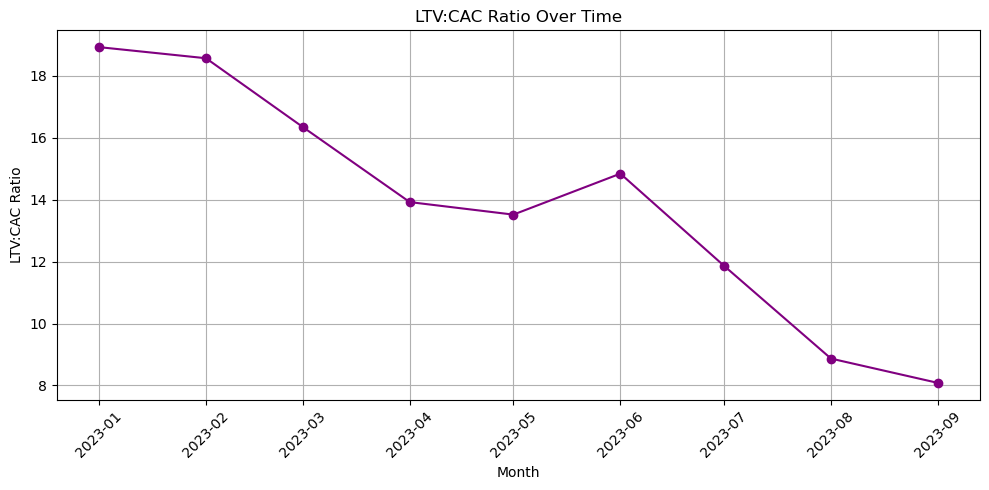

In [111]:
import matplotlib.pyplot as plt

# Ensure LTV_CAC_Ratio column is present
plt.figure(figsize=(10,5))
plt.plot(ltv_cac_ratio["Month"], ltv_cac_ratio["LTV_CAC_Ratio"], marker='o', color='purple')
plt.title("LTV:CAC Ratio Over Time")
plt.xlabel("Month")
plt.ylabel("LTV:CAC Ratio")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [113]:
### KPI Calculations and Export for Tableau

import pandas as pd

# 1. Load datasets
revenue = pd.read_csv("C:/Users/HARI KRUPA/Downloads/revenue.csv")
expenses = pd.read_csv("C:/Users/HARI KRUPA/Downloads/expenses.csv")
customers = pd.read_csv("C:/Users/HARI KRUPA/Downloads/customers.csv", parse_dates=["JoinDate"])

# --------------------------------------------------------
# 2. Monthly Revenue
monthly_revenue = revenue.groupby("Month")["Amount"].sum().reset_index()
monthly_revenue.rename(columns={"Amount": "TotalRevenue"}, inplace=True)
monthly_revenue.to_csv("monthly_revenue.csv", index=False)

# --------------------------------------------------------
# 3. Monthly Burn Rate (Total Expenses)
monthly_burn = expenses.groupby("Month")["Amount"].sum().reset_index()
monthly_burn.rename(columns={"Amount": "TotalBurnRate"}, inplace=True)
monthly_burn.to_csv("monthly_burn_rate.csv", index=False)

# --------------------------------------------------------
# 4. Monthly CAC (Marketing Spend / New Customers)
# Filter for marketing expenses
marketing_expenses = expenses[expenses["Category"].str.lower() == "marketing"]
monthly_marketing = marketing_expenses.groupby("Month")["Amount"].sum().reset_index()
monthly_marketing.rename(columns={"Amount": "MarketingExpense"}, inplace=True)

# Add Month to customers from JoinDate
customers["Month"] = customers["JoinDate"].dt.to_period("M").dt.to_timestamp()

# Monthly new customers
monthly_new_customers = customers.groupby("Month")["CustomerID"].nunique().reset_index()
monthly_new_customers.rename(columns={"CustomerID": "NewCustomers"}, inplace=True)

# Convert Month columns to datetime for safe merging
monthly_marketing["Month"] = pd.to_datetime(monthly_marketing["Month"])
monthly_new_customers["Month"] = pd.to_datetime(monthly_new_customers["Month"])

# Merge and calculate CAC
cac = pd.merge(monthly_marketing, monthly_new_customers, on="Month", how="inner")
cac["CAC"] = cac["MarketingExpense"] / cac["NewCustomers"]
cac.to_csv("monthly_cac.csv", index=False)

# --------------------------------------------------------
# 5. Customer Lifetime Value (LTV)
# Total revenue per customer
revenue_per_customer = revenue.groupby("CustomerID")["Amount"].sum().reset_index()
revenue_per_customer.rename(columns={"Amount": "TotalRevenue"}, inplace=True)

# Estimate active months (assuming one row per month per customer)
active_months = revenue.groupby("CustomerID")["Month"].nunique().reset_index()
active_months.rename(columns={"Month": "LifetimeMonths"}, inplace=True)

# Merge and calculate LTV
revenue_per_customer = pd.merge(revenue_per_customer, active_months, on="CustomerID")
revenue_per_customer["LTV"] = revenue_per_customer["TotalRevenue"] / revenue_per_customer["LifetimeMonths"]
revenue_per_customer.to_csv("customer_ltv.csv", index=False)

# --------------------------------------------------------
# 6. LTV:CAC Ratio (Monthly average)
avg_ltv = revenue_per_customer["LTV"].mean()
avg_cac = cac["CAC"].mean()
ltv_cac_ratio = pd.DataFrame({
    "Metric": ["Avg_LTV", "Avg_CAC", "LTV_CAC_Ratio"],
    "Value": [avg_ltv, avg_cac, avg_ltv / avg_cac]
})
ltv_cac_ratio.to_csv("ltv_cac_ratio.csv", index=False)

print("✅ All KPI CSVs generated successfully!")


✅ All KPI CSVs generated successfully!


In [115]:
import os
print(os.getcwd())

C:\Users\HARI KRUPA
